In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import re

## Lineal

In [3]:
x = np.random.rand(20)
x.shape

(20,)

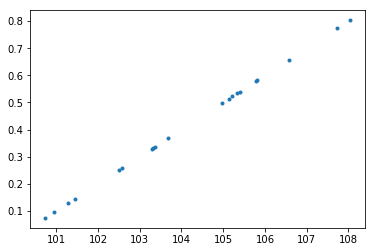

In [6]:
a = 100
b = 10
y = a + b*x
plt.plot(y, x, '.')
plt.show()

In [5]:
np.random.randn(x.shape[0])

array([ 0.40184297,  0.43395313,  1.17563071, -0.23961748,  0.52732604,
       -0.40398848, -1.62297124,  0.26089745,  0.60910677,  0.37574518,
        0.57521918,  0.65575678, -0.16857859, -0.38605054, -0.69589911,
        2.54322037,  1.85875884,  0.91882768,  0.12809155, -1.37997307])

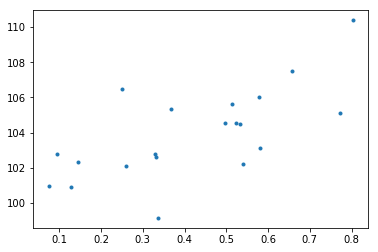

In [8]:
e = 2 * np.random.randn(x.shape[0])
y = a + b*x + e
plt.plot(x, y, '.')
plt.show()

In [9]:
slope, intercept, r_value, p_value, std_err = linregress(x,y)

In [11]:
print('a = ', intercept, '\nb = ', slope)

a =  100.613559978 
b =  8.0334074146


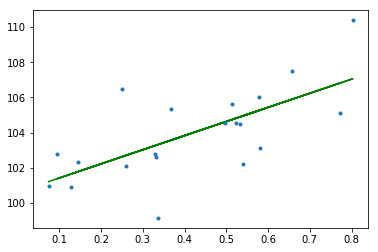

In [12]:
plt.plot(x, intercept + slope*x, 'g')
plt.plot(x,y,'.')
plt.show()

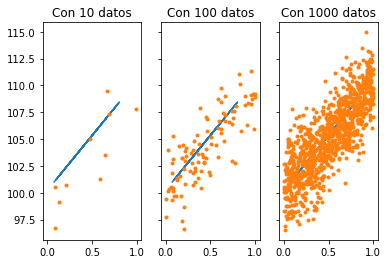

In [60]:
x1 = np.random.rand(10)
x2 = np.random.rand(100)
x3 = np.random.rand(1000)
e1 = 2 * np.random.randn(x1.shape[0])
e2 = 2 * np.random.randn(x2.shape[0])
e3 = 2 * np.random.randn(x3.shape[0])
y1 = a + b*x1 + e1
y2 = a + b*x2 + e2
y3 = a + b*x3 + e3

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex = True)
ax1.plot(x, intercept + slope*x)
ax1.plot(x1, y1, '.')
ax1.set_title('Con 10 datos')
ax2.plot(x, intercept + slope*x)
ax2.plot(x2,y2,'.')
ax2.set_title('Con 100 datos')
ax3.plot(x, intercept + slope*x)
ax3.plot(x3,y3,'.')
ax3.set_title('Con 1000 datos')
plt.show()

## Polinomial

In [121]:
x = 10*np.random.rand(200)
a = 0
b = 5
e = 20*np.random.randn(x.shape[0])
y = a + b*(x**2) + e

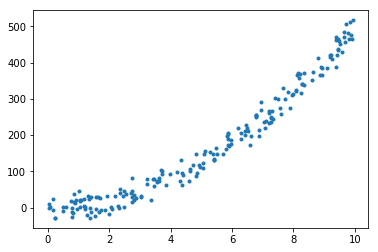

In [122]:
plt.plot(x,y, '.')
plt.show()

In [123]:
poli = np.polyfit(x,y,2)
poli

array([ 4.8317148 ,  1.67969994, -3.00521246])

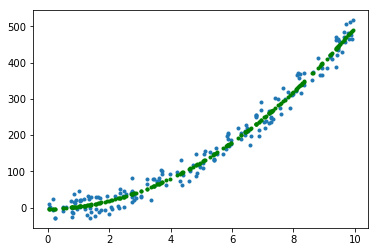

In [132]:
poli_eval = np.poly1d(poli)
plt.plot(x, y, '.')
plt.plot(x, poli_eval(x), 'g.')
plt.show()

In [126]:
#Ejercicio: relación entre pasajeros y operaciones nacionales. 
#¿Qué aeropuertos son los más eficientes?
ops = pd.DataFrame.from_csv('datos/ASA_ops.csv')
ops = ops.reset_index()
pas = pd.DataFrame.from_csv('datos/ASA_pasa.csv')
pas = pas.reset_index()

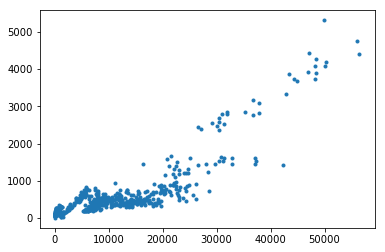

In [137]:
new = ops.merge(pas)
plt.plot(new['Pasajeros nacionales'], new['Operaciones nacionales'], '.')
plt.show()

In [138]:
slope, intercept, r_value, p_value, std_err = linregress(new['Pasajeros nacionales'], new['Operaciones nacionales'])
print('a = ', intercept, '\nb = ', slope)

a =  -50.5512608406 
b =  0.0604942111915


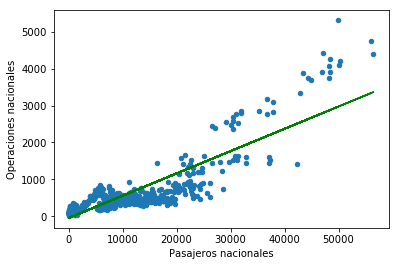

In [145]:
new.plot(x = 'Pasajeros nacionales', y = 'Operaciones nacionales', kind = 'scatter')
plt.plot(new['Pasajeros nacionales'], intercept + slope*new['Pasajeros nacionales'], 'g')
plt.show()

Parece que hay una relación lineal

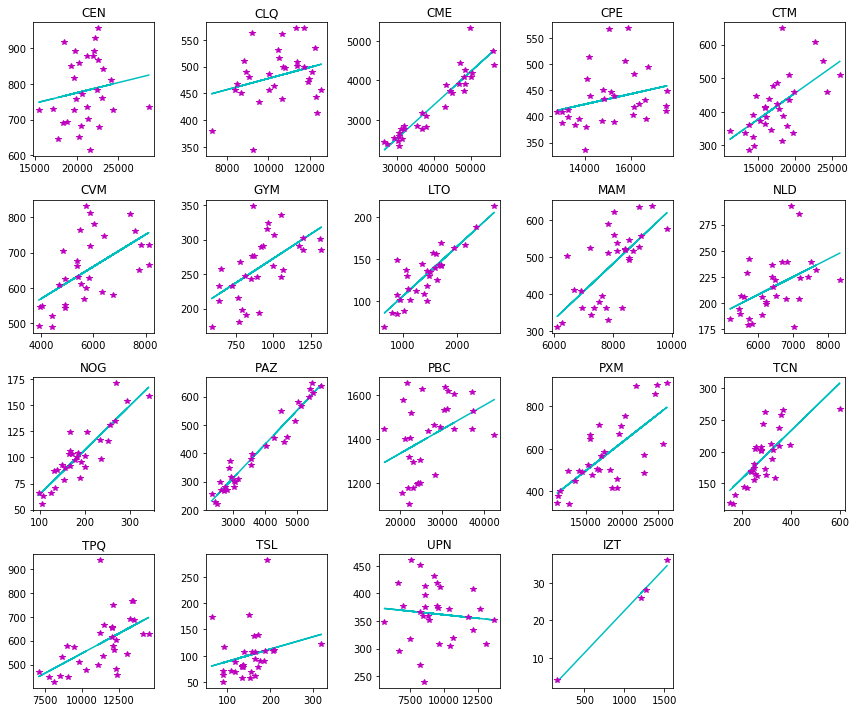

In [236]:
i = 1
tabla_errores = pd.DataFrame()
plt.figure(figsize=(12,10))
for iata in new['Codigo IATA'].unique():
    aux = new[new['Codigo IATA'] == iata]
    slope, intercept, r_value, p_value, std_err = linregress(aux['Pasajeros nacionales'], aux['Operaciones nacionales'])
    plt.subplot(4, 5, i)
    plt.plot(aux['Pasajeros nacionales'], intercept + slope*aux['Pasajeros nacionales'],'c')
    plt.plot(aux['Pasajeros nacionales'], aux['Operaciones nacionales'], 'm*')
    plt.title(iata)
    tabla_errores = tabla_errores.append({'slope': slope, 'std_err': std_err, 'r_value': r_value, 'Codigo IATA': iata}, ignore_index = True)
    i = i+1
plt.tight_layout()
#plt.subplots_adjust(hspace = 0.5)
plt.show()

In [195]:
tabla_errores = tabla_errores.sort_values(by = 'r_value', ascending=False)
tabla_errores.head()

,Codigo IATA,r_value,slope,std_err
18,IZT,0.996377,0.022482,0.001357
11,PAZ,0.973595,0.119858,0.005219
2,CME,0.939038,0.084184,0.005724
10,NOG,0.884229,0.423161,0.041506
7,LTO,0.853177,0.058592,0.006652


Éstas son las 5 IATAs más eficientes (se apegan más a la relación esperada)

***
<img src="http://images5.fanpop.com/image/articles/133000/bakugan-and-sailor-moon_133985_2.jpg?cache=1321473044"/>

## Mega ejercicio
<font color=pink>
<br>
Usando la base de datos de videos de YouTube: <br>
1. ¿Cuál es la distribución de likes, dislikes y views? <br>
2. Hay alguna relación entre estas variables y el número de comentarios por video? <br>
3. Hay alguna relación entre el sentimiento de comentarios y los likes? <br>
</font> 

In [39]:
vid = pd.DataFrame.from_csv('datos/GBvideos.csv')
vid.head(2)

,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
video_id,,,,,,,,,,
jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09


In [28]:
com = pd.DataFrame.from_csv('datos/GBcomments.csv')
com.head(2)

,comment_text,likes,replies
video_id,,,
jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0


### Pregunta 1

In [4]:
preg1 = vid[['likes', 'dislikes', 'views']]
preg1.head()

,likes,dislikes,views
0,78240,13548,7426393
1,2651,1309,494203
2,13119,151,142819
3,65729,1529,1580028
4,5019,57,40592


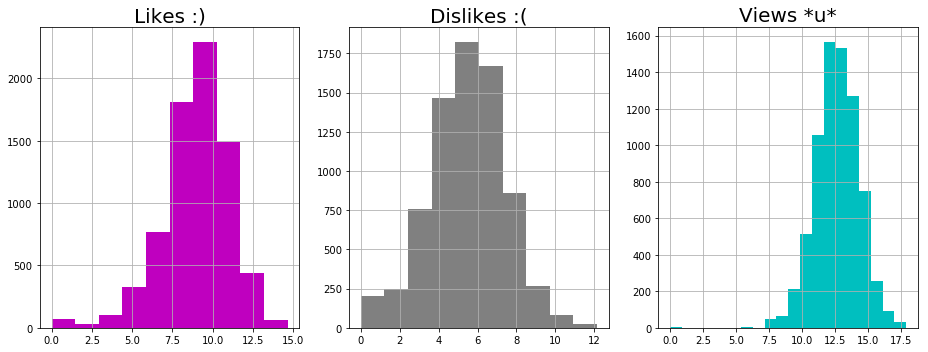

In [143]:
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
np.log(preg1.likes + 1).hist(color = 'm', bins = 10)
plt.title('Likes :)', size=20)
plt.subplot(1,3,2)
np.log(preg1.dislikes + 1).hist(color = '0.5', bins = 10)
plt.title('Dislikes :(', size=20)
plt.subplot(1,3,3)
np.log(preg1.views + 1).hist(color = 'c', bins = 20)
plt.title('Views *u*', size=20)
plt.tight_layout()
plt.show()

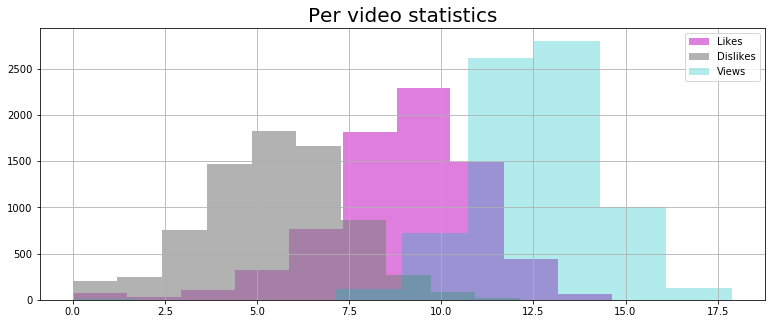

In [189]:
plt.figure(figsize=(13,5))
np.log(preg1.likes + 1).hist(color = 'm', bins = 10, alpha = 0.5, label = 'Likes')
np.log(preg1.dislikes + 1).hist(color = '0.5', bins = 10, alpha = 0.6, label = 'Dislikes')
np.log(preg1.views + 1).hist(color = 'c', bins = 10, alpha = 0.3, label = 'Views')
plt.legend()
plt.title('Per video statistics', size = 20)
plt.show()

### Pregunta 2

In [94]:
preg2 = vid[['likes', 'dislikes', 'views', 'comment_total']]
preg2.head()

,likes,dislikes,views,comment_total
0,78240,13548,7426393,705
1,2651,1309,494203,0
2,13119,151,142819,1141
3,65729,1529,1580028,3598
4,5019,57,40592,490


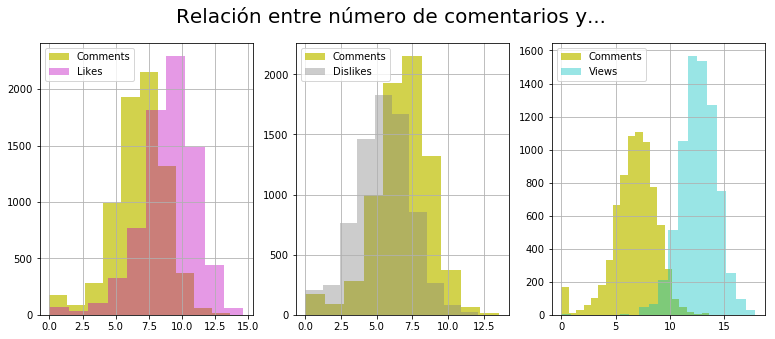

In [191]:
plt.figure(figsize = (13,5))
plt.subplot(1,3,1)
np.log(preg2.comment_total + 1).hist(label = 'Comments', bins = 10, alpha = 0.7, color = 'y')
np.log(preg1.likes + 1).hist(color = 'm', bins = 10, label = 'Likes', alpha = 0.4)
plt.legend()
plt.subplot(1,3,2)
np.log(preg2.comment_total + 1).hist(label = 'Comments', bins = 10, alpha = 0.7, color = 'y')
np.log(preg1.dislikes + 1).hist(color = '0.5', bins = 10, label = 'Dislikes', alpha = 0.4)
plt.legend()
plt.subplot(1,3,3)
np.log(preg2.comment_total + 1).hist(label = 'Comments', bins = 20, alpha = 0.7, color = 'y')
np.log(preg1.views + 1).hist(color = 'c', bins = 20, label = 'Views', alpha = 0.4)
plt.legend()
plt.suptitle('Relación entre número de comentarios y...', size = 20)
plt.show()

### Pregunta 3

In [5]:
with open('datos/positive-words.txt') as f:
    pos = f.readlines()
    pos = [x.strip('\n') for x in pos]

with open('datos/negative-words.txt') as f:
    neg = f.readlines()
    neg = [x.strip('\n') for x in neg]

In [33]:
sen = pd.DataFrame({'sen': [1]*len(pos) + [-1]*len(neg)}, index = pos + neg)
sen.count()

sen    6789
dtype: int64

In [34]:
sen_dicc = sen.to_dict()['sen']

In [44]:
def sen_of_com (comm):
    a = np.array([sen_dicc.get(x) for x in re.findall('\w+', comm)])
    a = a[np.where(a)]
    if a.shape[0] > 0:
        return np.mean(a)
    else:
        return 0

In [46]:
sen_of_vid = (
            com[com.comment_text.notnull()]['comment_text']
            .apply(sen_of_com).reset_index().groupby('video_id')
            .agg(np.mean).reset_index().rename(columns = {'comment_text': 'sen'})
            .merge(vid.reset_index())
)

In [50]:
sen_of_vid.head(3)

,video_id,sen,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,-1fzGnFwz9M,0.150000,9 Things You Need To Know About Kittens - Simo...,Simon's Cat,15,cartoon|simons cat|simon's cat|simonscat|simon...,189372,7070,112,288,https://i.ytimg.com/vi/-1fzGnFwz9M/default.jpg,13.09
1,-1fzGnFwz9M,0.150000,9 Things You Need To Know About Kittens - Simo...,Simon's Cat,15,cartoon|simons cat|simon's cat|simonscat|simon...,197531,7176,117,291,https://i.ytimg.com/vi/-1fzGnFwz9M/default.jpg,14.09
2,-Ifnaxi2LQg,0.136667,Fergie - You Already Know ft. Nicki Minaj,FergieVEVO,10,Fergie|You|Already|Know|BMG|Rights|Management|...,814262,66290,3557,5546,https://i.ytimg.com/vi/-Ifnaxi2LQg/default.jpg,13.09


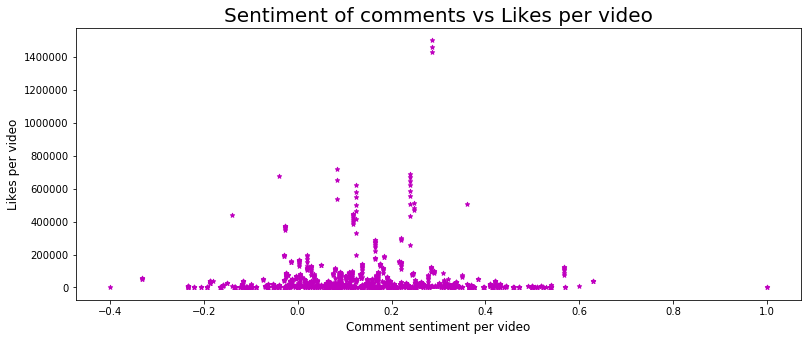

In [64]:
sen_of_vid.plot(x = 'sen', y = 'likes', kind = 'scatter', c = 'm', marker = '*', figsize = (13,5))
plt.title('Sentiment of comments vs Likes per video', size = 20)
plt.xlabel('Comment sentiment per video', size = 12)
plt.ylabel('Likes per video', size = 12)
plt.show()